# Business Understanding

In this code, we took a closer look at the IT sector with the aim of trying to identify the latest trends to increase our odds of finding a job.
In particular, we will be analysing StackOverflow's 2018 and 2019 Developer Surveys to find answers to the followin questions:

<ol>
<li>What are the countries with the highest percentage of employed programmers?</li>
<li>What are the most common contracts offered?</li>
<li>What are the top programming languages used at work?</li>
</ol>

# Data Understanding

## Performing Exploratory Data Analysis on Surveys

In this section, we'll have a look at the data within our surveys to summarize their main characteristics and understand which filters we'll have to apply to answer our questions

In [39]:
#Imports
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Importing 2019 StackOverflow's survey results
df_2019 = pd.read_csv('./2019_survey_results_public.csv')
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [40]:
#Importing 2018 StackOverflow's survey results
df_2018 = pd.read_csv('./2018_survey_results_public.csv')
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [8]:
df_2019.Employment.unique().tolist()

['Not employed, and not looking for work',
 'Not employed, but looking for work',
 'Employed full-time',
 'Independent contractor, freelancer, or self-employed',
 nan,
 'Employed part-time',
 'Retired']

In [6]:
df_2018.Employment.unique().tolist()

['Employed part-time',
 'Employed full-time',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work',
 'Not employed, but looking for work',
 nan,
 'Retired']

Above we're listing all possible values users were able to select for their Employment Status.
Since our first question aims to study employment rates, we are going to consider only users that were either:
<ul>
<li>Employed full-time</li>
<li>Independent contractor, freelancer, or self-employed</li>
<li>Employed part-time</li>
</ul>
In order to perform this first analysis we'll also have to get rid of any potential records where users decided not to share their country or employment status, as those are not useful for answering our question.
The same 3 type of contracts above will be used to perform an analysis on the most offered type of contracts to reply our second question.

In [44]:
df_2019.LanguageWorkedWith.unique().tolist()[:30]

['HTML/CSS;Java;JavaScript;Python',
 'C++;HTML/CSS;Python',
 'HTML/CSS',
 'C;C++;C#;Python;SQL',
 'C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA',
 'Java;R;SQL',
 'HTML/CSS;JavaScript',
 'Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;JavaScript;Python;SQL',
 'Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):',
 'C#;Go;JavaScript;Python;R;SQL',
 'Other(s):',
 'Bash/Shell/PowerShell;HTML/CSS;Java;Python;R;SQL',
 'Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript',
 'C++',
 'Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;JavaScript;PHP;SQL',
 'Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;TypeScript;VBA',
 'Bash/Shell/PowerShell;HTML/CSS;JavaScript;TypeScript',
 'Python;R',
 'C#;HTML/CSS;Java;JavaScript;SQL;TypeScript',
 'Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL',
 'Assembly;Bash/Shell/PowerShell;C;C++;Go;Java;JavaScript;Kotlin;Python;Rust;SQL;Swift',
 'Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;Python;R

In [43]:
df_2018.LanguageWorkedWith.unique().tolist()[:30]

['JavaScript;Python;HTML;CSS',
 'JavaScript;Python;Bash/Shell',
 nan,
 'C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell',
 'C;C++;Java;Matlab;R;SQL;Bash/Shell',
 'Java;JavaScript;Python;TypeScript;HTML;CSS',
 'JavaScript;HTML;CSS',
 'JavaScript;TypeScript;HTML;CSS',
 'Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua;Python;Ruby;SQL;HTML;CSS;Bash/Shell',
 'Java',
 'Java;JavaScript;PHP;VB.NET;HTML;CSS',
 'C#;SQL;HTML;CSS;Bash/Shell',
 'C;C++;C#',
 'C;C++;Go;Python;SQL;Swift',
 'C;C++;C#;Groovy;JavaScript;Python;SQL;HTML;CSS;Bash/Shell',
 'C#;JavaScript;PHP;SQL;HTML;CSS',
 'JavaScript;PHP;SQL;HTML;CSS;Bash/Shell',
 'C;C++;Java;JavaScript;SQL;Swift;Kotlin',
 'Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS',
 'C#;Java;JavaScript;PHP;SQL;HTML;CSS',
 'C#;JavaScript;SQL;HTML;CSS',
 'C#;Java;JavaScript;PHP;TypeScript;HTML;CSS',
 'Python;SQL;HTML;Bash/Shell',
 'Java;JavaScript;PHP;SQL;Swift;TypeScript;HTML;CSS;Bash/Shell',
 'Java;JavaScript;Objective-C;PHP;SQL;Swift;HTML;CSS;Bash/Shell',
 'JavaScrip

As for our last question, we'll have to study the programming languages currently used by employed users to understand what are the most used currently on the market.<br>
Apparently these languages are separated by ";" in a single cell for every user. In order to calculate usage percentages for these languages we'll have to split them into rows to count overall usage.<br>
Additionally some data cleansing is required as a few programming languages are aggregated into a single selection for 2019 while 2018 allows to select them singularly, for example:<br>
in 2019, HTML/CSS are single selection ('C++;HTML/CSS;Python') while in 2018 users could select them singluarly ('C#;SQL;HTML;CSS;Bash/Shell')<br>
Similarly to what we've done for the other two questions, we'll also have to remove any rows where users decided not to share their programming languages used for work, as those are not contributing to answering our question

## What are the countries with the highest percentage of employed programmers?

Let's take a look at what are the countries where it's easier to find a job as a developer.<br>
As seen in the Data Exploration section, our first step here will be selecting only employed users from our survey before grouping our results by country to show the final answer.

In [17]:
#Filtering dataset in order to select only employed users
df_2019_filtered = df_2019[df_2019['Employment'].isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time'])].dropna(subset=['Employment','Country'])
df_2018_filtered = df_2018[df_2018['Employment'].isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time'])].dropna(subset=['Employment','Country'])

#Selecting Only relevant columns for graph and adding a Year Variable to allow comparison
df_2019_filtered['Year']=2019
df_2019_filtered=df_2019_filtered[['Employment','Country','Year']]

#same for 2018
df_2018_filtered['Year']=2018
df_2018_filtered=df_2018_filtered[['Employment','Country','Year']]

#Appending the two datasets above
df_total_employed = df_2019_filtered.append(df_2018_filtered)

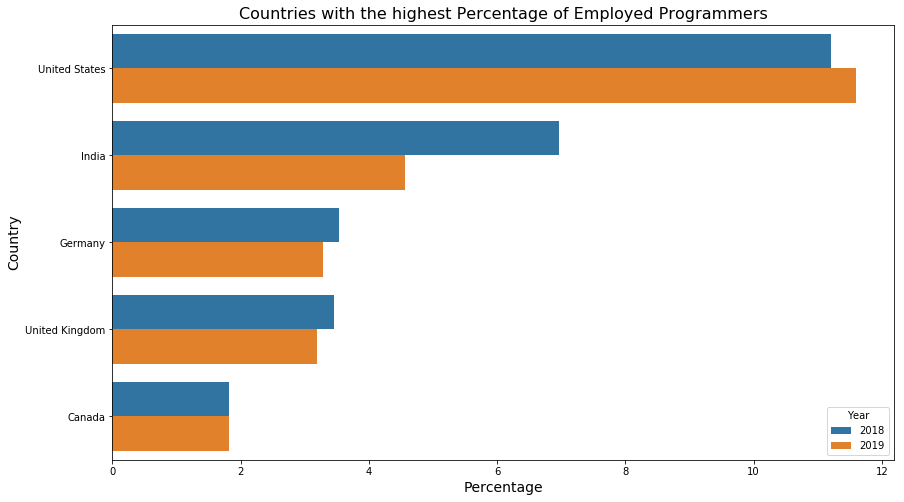

In [18]:
#Sorting and grouping datasets
df1=df_total_employed.groupby([df_total_employed.Country,df_total_employed.Year])['Employment'].count().reset_index()
df1['Percentage'] = 100 * df1['Employment']/df1['Employment'].sum()

#Plot Total Employed by Year - no matter the type of Contract
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Country',
            hue = 'Year',
            data = df1.sort_values(by='Percentage', ascending=False).head(10))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Countries with the highest Percentage of Employed Programmers', size = 16)
plt.show()


## Answers to Question 1

US,India, Germany, UK and Canada are the leading countries in terms of employment percentages:<br>

<ol>
<li>The United States are first in terms of percentage of employed programmers with a small increase in numbers from 2018</li>
<li>India follows on the list despite a noticeable fall from 2018.</li>
<li>UK and Germany see a small drop in 2019 and show really similar percentages.</li>
<li>Finally, Canada‘s percentage of employment remained unchanged during the period we analyzed.</li>
</ol>

## What are the most common contracts offered?

To answer this question, we'll be again focusing only on employed users by looking which of the following contracts are most common today vs 2018:

<ul>
<li>Employed Full-Time.</li>
<li>Independent contractor, freelancer, or self-employed.</li>
<li>Employed Part-Time.</li>
</ul>

In [32]:
#Most Common Contract type offered by top Countries 2019
df2=df_2019_filtered.groupby([df_2019_filtered.Country,df_2019_filtered.Employment])['Year'].count().rename('count').reset_index(name='count')
df2['Percentage'] = 100 * df2['count']/df2['count'].sum()

df2_head5=df2.sort_values(by='Percentage', ascending=False).head(5)

df2_top5_cntry=df2_head5['Country'].tolist()

df2=df2[df2['Country'].isin(df2_top5_cntry)]

#Most Common Contract type offered by top Countries 2018
df3=df_2018_filtered.groupby([df_2018_filtered.Country,df_2018_filtered.Employment])['Year'].count().rename('count').reset_index(name='count')
df3['Percentage'] = 100 * df3['count']/df3['count'].sum()

df3_head5=df3.sort_values(by='Percentage', ascending=False).head(5)

df3_top5_cntry=df3_head5['Country'].tolist()

df3=df3[df3['Country'].isin(df3_top5_cntry)]

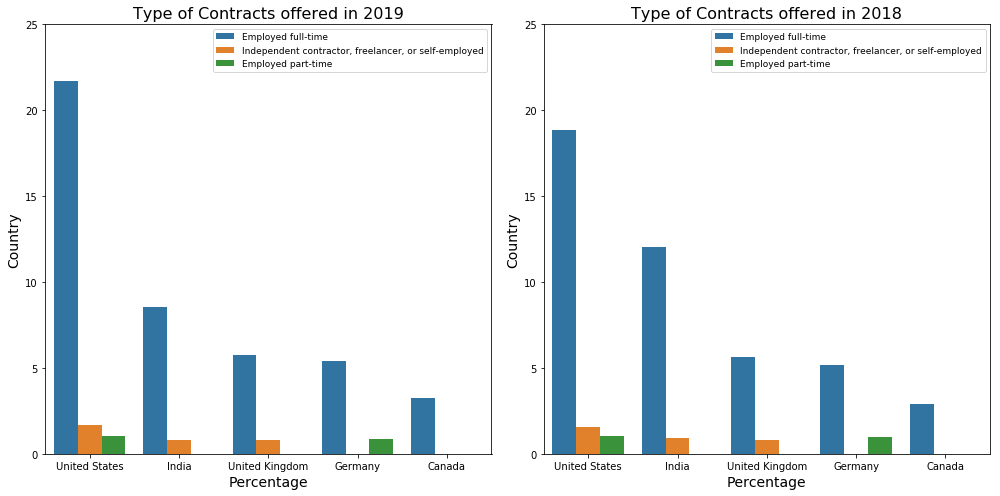

In [37]:
#Side by Side Plot


def sbs_plot(df1, df2, x, y, hue,title1,title2,legendposition,ylim1,yticklabel1,ylim2,yticklabel2):
    ''' Plot two side by side barcharts for the input datasets
    '''
        #Parameters:
    #    DataFrame (df1): first input DataFrame to plot
    #    DataFrame (df2): second input DataFrame to plot
    #    x: Value of x-axis for both graphs
    #    y: Value of y-axis for both graphs
    #    hue: Value of graph hue
    #    title1: Title of first graph
    #    title2: Title of second graph
    #    ylim1: Range of limits for first graph y-axis
    #    yticklabel1: Tick Labels for first graph y-axis
    #    ylim2: Range of limits for second graph y-axis
    #    yticklabel2: Tick Labels for second graph y-axis
    
    
    #Returns:
    #    reverse(str1):The string which gets reversed.   
    
    
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=(14,7))

    a=plt.subplot(1, 2, 1)
    sns.barplot(x = x, 
                y = y,
                hue = hue,
                data = df1)
    a.set_ylim(ylim1)
    a.set_yticklabels(yticklabel1)
    plt.xlabel(y, fontsize = 14)
    plt.ylabel(x, fontsize = 14)
    plt.title(title1, size = 16)

    plt.legend(loc=legendposition, prop={'size': 9})

    b=plt.subplot(1, 2, 2)
    sns.barplot(x = x, 
                y = y,
                hue = hue,
                data = df2)
    b.set_ylim(ylim2)
    b.set_yticklabels(yticklabel2)
    plt.xlabel(y, fontsize = 14)
    plt.ylabel(x, fontsize = 14)
    plt.title(title2, size = 16)

    plt.legend(loc=legendposition, prop={'size': 9})

    fig.tight_layout()
    ax2.plot()
        
sbs_plot(df2.sort_values(by='Percentage', ascending=False).head(10),df3.sort_values(by='Percentage', ascending=False).head(10),'Country','Percentage','Employment','Type of Contracts offered in 2019','Type of Contracts offered in 2018','upper right',[0,25],[0,5,10,15,20,25],[0,25],[0,5,10,15,20,25])

## Answers to Question 2

From the above graph, we can see that Freelancer and part-time jobs are extremely unpopular in the IT sector and we are most likely to find a job as a full-time employee.

## What are the top programming languages used at work?

Here we'll study the programming language currently used by our survey used at work during 2018 and 2019. We'll try to understand if there have been any changes from 2018 and what are the programming languages we have to master to increase our chances of finding a job.<br>

Our very first step here will be to selct the fields relevant for replying our question while removing any occurrence from our survey where users decided not to specify their Country of belonging or the language they worked with since those are not useful for replying our question.

For each user, our survey lists the programming languages used at work in a single cell separated by a semicolon.<br>
That doesn't allow us to count percentages so we'll have to split these cells into multiple rows before calculating our percentages.<br><br>
Additionally, as seen in our data exploration chapter, data cleansing is required as a few programming languages are aggregated into a single selection for 2019 while 2018 allows to select them singularly, for example:<br>
in 2019, HTML/CSS are single selection ('C++;HTML/CSS;Python') while in 2018 users could select them singluarly ('C#;SQL;HTML;CSS;Bash/Shell')<br>

In [25]:
#Getting only fields relevant for our next analysis and dropping rows where user did not specify 'Country' or 'LanguageWorkedWith'
df_2019_lang = df_2019[['Country','LanguageWorkedWith','Respondent']].dropna(subset=['Country','LanguageWorkedWith','Respondent'])
df_2018_lang = df_2018[['Country','LanguageWorkedWith','Respondent']].dropna(subset=['Country','LanguageWorkedWith','Respondent'])

#This step will separate the Programming Languages in the "LanguageWorkedWith" field into several rows to allow calculations

#2018
df_2018_lang=(df_2018_lang.set_index(['Respondent', 'Country'])
   .stack()
   .str.split(';', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)  

#2019
df_2019_lang=(df_2019_lang.set_index(['Respondent', 'Country'])
   .stack()
   .str.split(';', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)                                           

#2018 data needs cleaning as in 2018 some programming languages are separate in different cells while 2019 data groups them up in the same
df_2018_lang.replace(['HTML','CSS'] , 'HTML/CSS',inplace=True)
df_2018_lang.replace('PowerShell' , 'Bash/Shell/PowerShell',inplace=True)
df_2018_lang.replace('Bash/Shell' , 'Bash/Shell/PowerShell',inplace=True)

#Removing duplicates
df_2018_lang=df_2018_lang.drop_duplicates(subset=['Respondent','LanguageWorkedWith','Country'], keep="last")

#Adding Year
df_2019_lang['Year']=2019
df_2018_lang['Year']=2018

#Most common programming languages in 2019
df_2019_lang=df_2019_lang.groupby([df_2019_lang.Country,df_2019_lang.LanguageWorkedWith])['Year'].count().rename('count').reset_index(name='count')
df_2019_lang['Percentage'] = 100 * df_2019_lang['count']/df_2019_lang['count'].sum()


#Using same top5 countries as above to evaluate most common programming languages used for work

df_2019_lang=df_2019_lang[df_2019_lang['Country'].isin(df3_top5_cntry)]

df_2019_lang.head()

#Most common programming languages in 2018

df_2018_lang=df_2018_lang.groupby([df_2018_lang.Country,df_2018_lang.LanguageWorkedWith])['Year'].count().rename('count').reset_index(name='count')
df_2018_lang['Percentage'] = 100 * df_2018_lang['count']/df_2018_lang['count'].sum()


#Using same top5 countries as above to evaluate most common programming languages used for work

df_2018_lang=df_2018_lang[df_2018_lang['Country'].isin(df3_top5_cntry)]

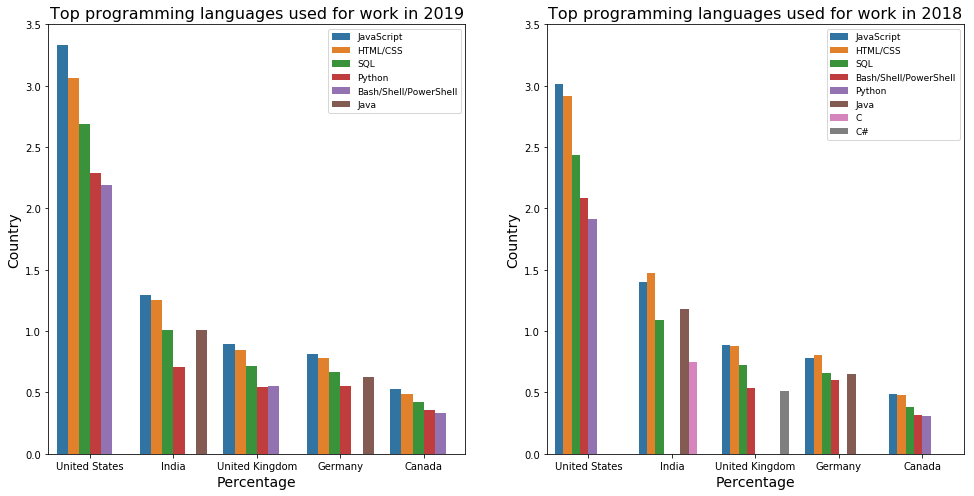

In [38]:
#using the same function defined above to plot another side by side graph showing top programming languages used for work in 2019 vs 2018
sbs_plot(df_2019_lang.sort_values(by='Percentage', ascending=False).groupby('Country',sort=False).head(5),df_2018_lang.sort_values(by='Percentage', ascending=False).groupby('Country',sort=False).head(5),'Country','Percentage','LanguageWorkedWith','Top programming languages used for work in 2019','Top programming languages used for work in 2018','upper right',[0.0,3.5],[0.0,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],[0.0,3.5],[0.0,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

## Answers to Question 3

The results show that classic and commonly used programming languages like JavaScript, HTML, and SQL are still dominating the market.
We can see that Python has grown closer to these languages likely due to its versatility and extensive use in data science, one of the latest and fastest-growing fields in IT.